In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### description of the columns in the dataset
##### survival - Survival (0 = No; 1 = Yes); class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd); name - Name of the passenger; sex - Sex of the passenger; age - Age of the passenger; sibsp - Number of Siblings/Spouses Aboard; parch - Number of Parents/Children Aboard; ticket - Ticket Number; fare - Passenger Fare; cabin - Cabin; embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Proportion of target(Survived)

In [7]:
data.groupby('Survived')['PassengerId'].count() #or data.Survived.value_counts()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

## Visual Exploration

<AxesSubplot:xlabel='Survived', ylabel='Age'>

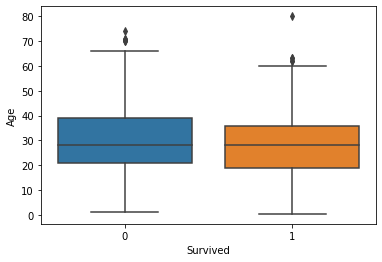

In [17]:
sns.boxplot(x='Survived', y='Age', data=data) #boxplot for 2 variables, one must be discrete(survived) and the other must be continuous(Age)

#### The insights that can be drawn from the above boxplot are: very less chance for the passengers whose age>=60, and so on..

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

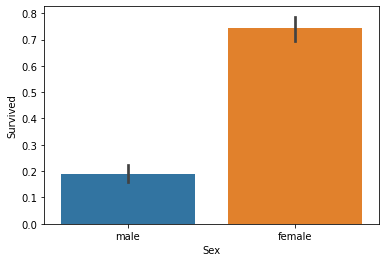

In [18]:
sns.barplot(x='Sex', y='Survived', data=data) #here 'survived' is continuous as here it represents the survival rate

#### From the above barplot, we can see that the females have higher survival rate

<AxesSubplot:xlabel='Sex', ylabel='Age'>

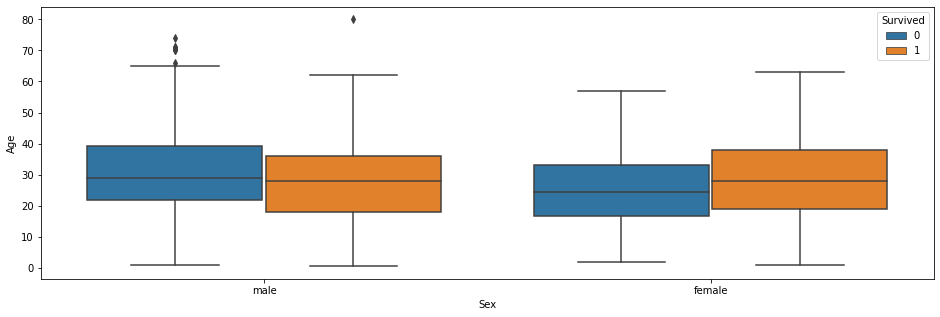

In [19]:
f,ax= plt.subplots(figsize=(16,5))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=data)

#### From the above plot, we can interpret that, no matter what is the age, the survival rate for males is less whereas for females it is high.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

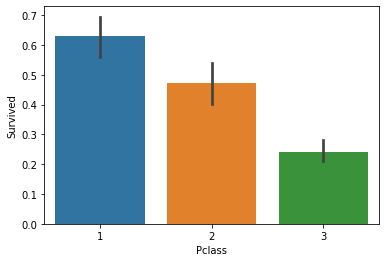

In [20]:
sns.barplot(x='Pclass', y='Survived', data=data)

#### From the above plot, we can see that the passengers of class 1 have survived the most, and the class 3 have survived less.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

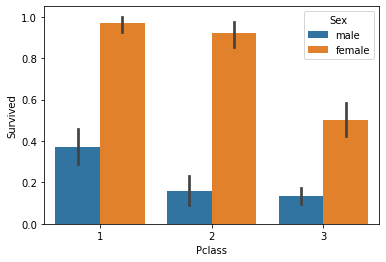

In [21]:
sns.barplot(x='Pclass', y='Survived',hue='Sex', data=data)

#### From the above barplot, we can see that, no matter what the class is, the females have survived the most.

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

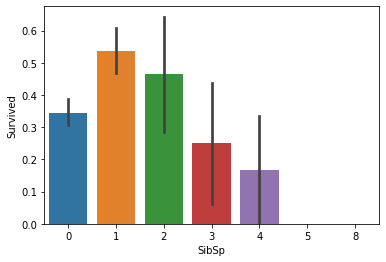

In [22]:
sns.barplot(x="SibSp", y="Survived", data=data)

#### From the above plot, the insights that can be drawn are: passengers having 1 child/ spouse, their survival rate is high; and gradually as no. of siblings increases, the survival rate is less; for the passengers with 5/8 siblings , the survival rate is 0.

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

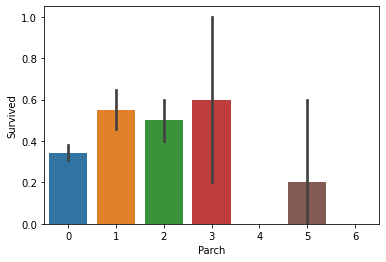

In [23]:
sns.barplot(x="Parch", y="Survived", data=data)

#### From the above barplot, the insights that can be drawn are: parents with 3 children, survived the most; parents with 4/6 childeren, the survival rate is 0 and so on..

Text(0.5, 1.0, 'Survived')

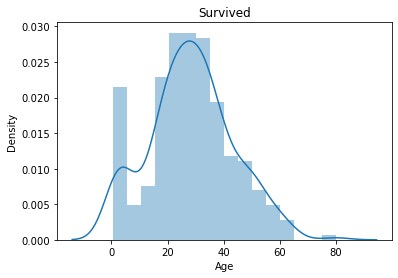

In [25]:
survived = data.loc[data['Survived']==1,"Age"].dropna()
sns.distplot(survived)
plt.title("Survived")

#### From the above distplot, the insights that can be drawn are: the passengers in b/w 20 to 40 , the density of survival rate is high. And for the age>=60, the survival rate is very less.

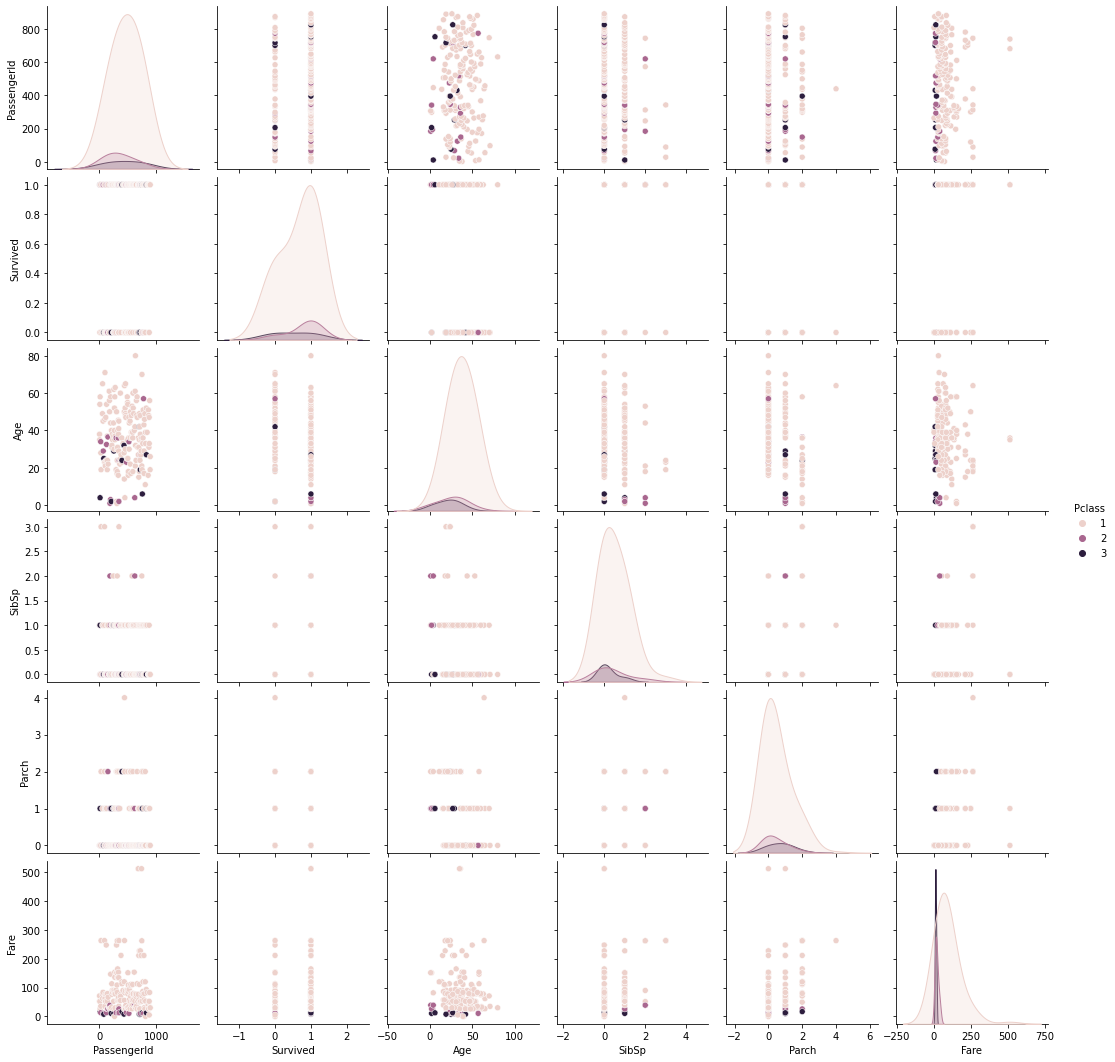

In [28]:
sns.pairplot(data.dropna(), hue='Pclass', diag_kws={'bw': 0.9})

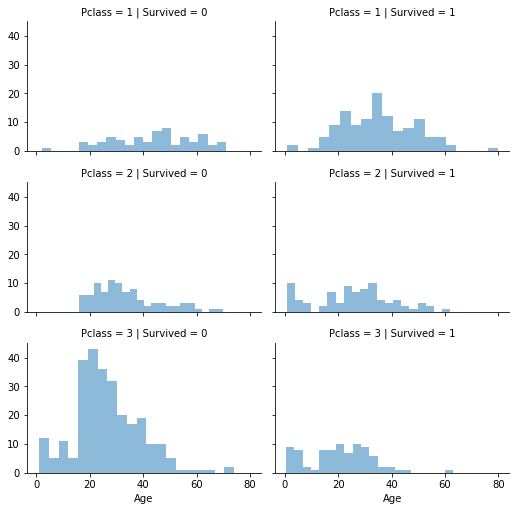

In [29]:
#Pclass vs Survived-- doing with 3 variables, where 2 are discrete(i.e survived & Pclass), and the other is continuous(i.e age)
grid=sns.FacetGrid(data, col='Survived', row='Pclass', size=2.4, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

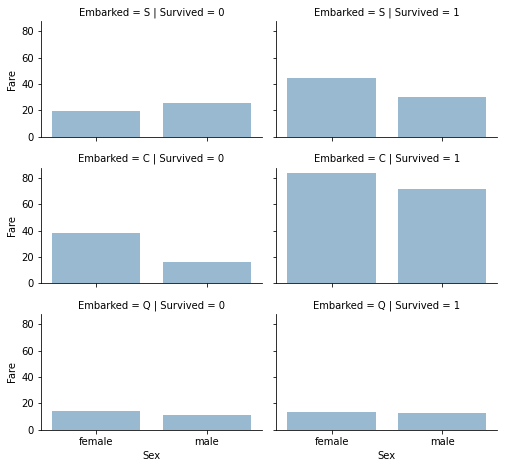

In [35]:
#Survived Vs Embarked-- doing with 4 variables, where 3 are discrete(i.e Embarked & survived & sex), and the other is continuous(i.e fare)
grid=sns.FacetGrid(data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare', alpha=0.5, ci=None) #ci=None-->conf. interval is none, so black bar is not dispalyed
grid.add_legend()